In [ ]:
name = 'Clasificador2'
path = '/content/drive/MyDrive/Proyecto5to/IA/'

#Codigo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
from keras.models import Sequential
from keras.saving import load_model

model_type = Sequential()
model_type = load_model(path + name + '.h5')

image_desired_size = None
types = None
with open(path + name + '.json') as f:
    d = json.load(f)
    print(d)
    image_desired_size = d['image_desired_size']
    types = d['image_types']

{'image_desired_size': [200, 200], 'image_types': ['chest_XRay', 'hips_XRay', 'head_ct']}


In [ ]:
from keras.preprocessing.image import load_img
from keras import utils
from tensorflow.image import resize

def Padding(i):
  padding = (0, image_desired_size[0] - np.shape(i)[0]), (0, image_desired_size[1] - np.shape(i)[1]), (0, 0)
  return np.pad(i, padding, 'constant', constant_values = ((0, 0), (0, 0), (0, 0)))
  #return np.pad(i, padding, 'median')

def GetFileList(dir = path):
    return os.listdir(dir)

def ReadImage(path):
  img = load_img(path)
  img = utils.img_to_array(img)
  img = resize(img, image_desired_size, preserve_aspect_ratio=True)
  img = img * 1/255 # Dividimos el valor de los pixeles por 255 para que el valor permanesca entre 1 y 0
  return img

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [ ]:
def GetPred(array):
  max = 0
  for i in range(len(array)):
    if(array[i] > array[max]):
      max = i
  return types[max]

#Mostrar Prediciones

chest.jfif
1/1 [==============================] - 0s 291ms/step
[0.47506246 0.17498094 0.17490423 0.17505239]
chest_XRay


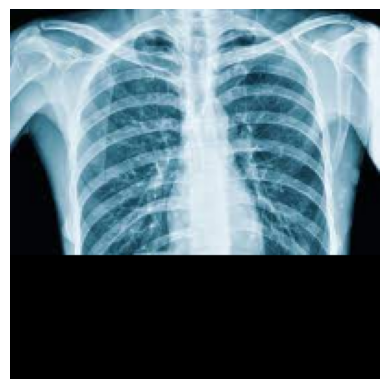

head.jfif
1/1 [==============================] - 0s 285ms/step
[0.18074249 0.1952361  0.4485189  0.17550252]
head_ct


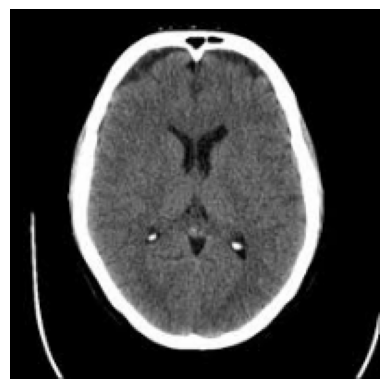

hips.jfif
1/1 [==============================] - 0s 285ms/step
[0.1807451  0.19523382 0.44851816 0.17550291]
head_ct


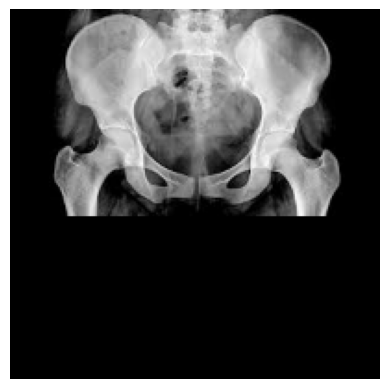

hip2.jfif
1/1 [==============================] - 0s 295ms/step
[0.17510328 0.47480077 0.1749835  0.17511249]
hips_XRay


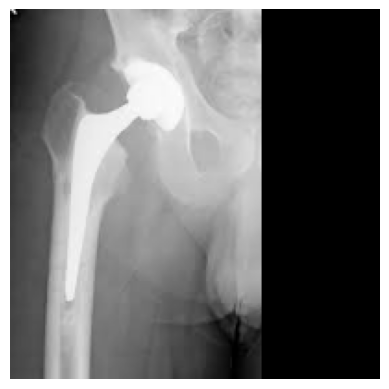

model.png
1/1 [==============================] - 0s 294ms/step
[0.18074085 0.19524212 0.44851488 0.1755021 ]
head_ct


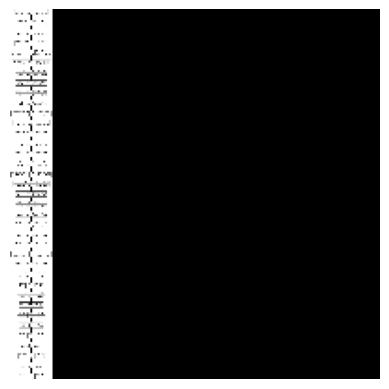

In [ ]:
for i in GetFileList(None):
  if not os.path.isfile(i): continue
  print(i)
  a = ReadImage(i)
  a = Padding(a)
  a = np.expand_dims(a, axis=0)
  b = model_type.predict(a)[0]
  print(b)
  print(GetPred(b))
  plt.imshow(utils.array_to_img(a[0]))
  plt.axis('off')
  plt.show()

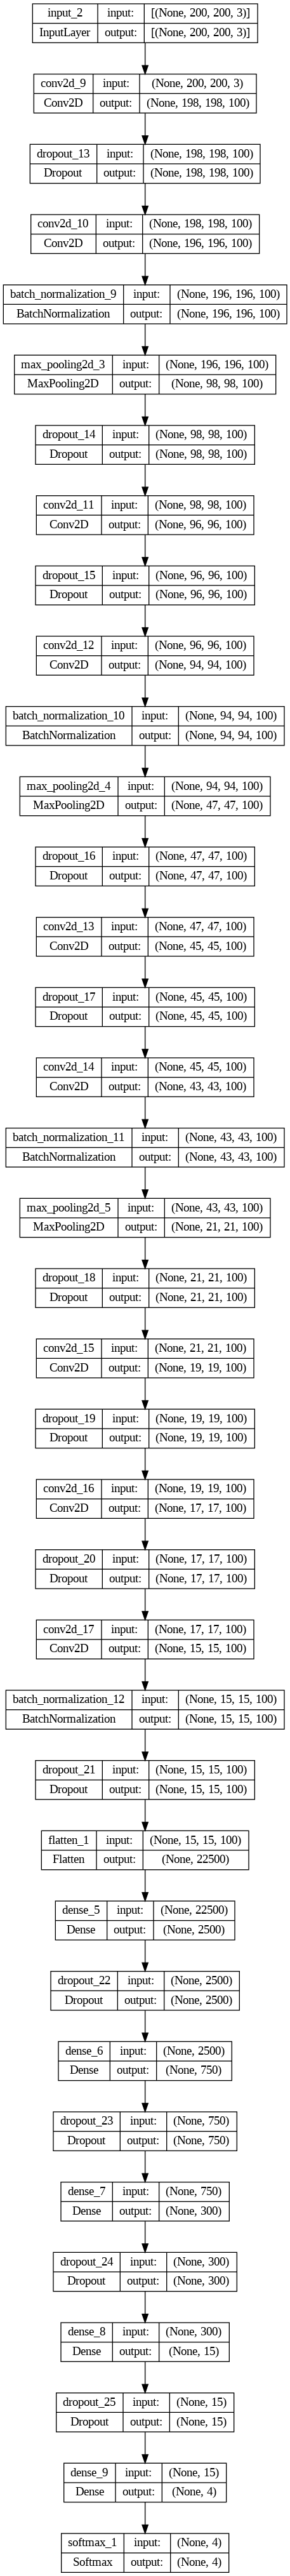

In [ ]:
utils.plot_model(model_type, show_shapes=True)